In [9]:
# import sys
# sys.path.insert(1, './wlcstat/')
import numpy as np
# import scipy.special as sp
# import scipy.optimize as opt
import matplotlib.pyplot as plt
import matplotlib.patches
import seaborn as sns
from matplotlib.colors import LogNorm

import itertools 
import pandas as pd
import os


# equilibration

currently observing many moves having dE = -inf. My guess is these are steric resolving moves- meaning unequilibrated.
see if running for 48 hours (15 snapshots) reduces the prevalence of these extremly-favorable moves. 

## Polymer energy

In [89]:

# directory_in_str = r"C:\Users\tmhab\wlcsim_membrane\chrom_stab\chromo_output\mu1_-2_mu2_-1.5"
# directory_in_str = r"C:\Users\tmhab\wlcsim_membrane\chrom_stab\chromo_output\mu1_-1_mu2_-0.5"
directory_in_str = r"C:\Users\tmhab\wlcsim_membrane\chrom_stab\chromo_output\mu1_-4\sim_8\acceptance_trackers"
directory = os.fsencode(directory_in_str)

df_list = []
filename_list = []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    full_path = os.fsdecode(os.path.join(directory, file))
    if filename.endswith(".csv"):
#         print(filename)
        df = pd.read_csv(full_path)

        pos_id = df[['dE']].copy()
        pos_id.columns = pos_id.iloc[0]
        pos_id = pos_id.drop(0)
        
        df_list.append(pos_id)
        if filename.startswith("crank"):
            filename_list.append(filename)
        
fileint_list = []
for file in filename_list:
    fileint_list.append(int(file[17:][:-4]))
    
fileint_list = fileint_list*5

change_binding_state_snap_0.csv
change_binding_state_snap_1.csv
change_binding_state_snap_10.csv
change_binding_state_snap_11.csv
change_binding_state_snap_12.csv
change_binding_state_snap_13.csv
change_binding_state_snap_14.csv
change_binding_state_snap_15.csv
change_binding_state_snap_2.csv
change_binding_state_snap_3.csv
change_binding_state_snap_4.csv
change_binding_state_snap_5.csv
change_binding_state_snap_6.csv
change_binding_state_snap_7.csv
change_binding_state_snap_8.csv
change_binding_state_snap_9.csv
crank_shaft_snap_0.csv
crank_shaft_snap_1.csv
crank_shaft_snap_10.csv
crank_shaft_snap_11.csv
crank_shaft_snap_12.csv
crank_shaft_snap_13.csv
crank_shaft_snap_14.csv
crank_shaft_snap_15.csv
crank_shaft_snap_2.csv
crank_shaft_snap_3.csv
crank_shaft_snap_4.csv
crank_shaft_snap_5.csv
crank_shaft_snap_6.csv
crank_shaft_snap_7.csv
crank_shaft_snap_8.csv
crank_shaft_snap_9.csv
end_pivot_snap_0.csv
end_pivot_snap_1.csv
end_pivot_snap_10.csv
end_pivot_snap_11.csv
end_pivot_snap_12.csv


In [99]:
# avg_dE_list = np.zeros(len(filename_list))
sum_dE_list = np.zeros(len(filename_list))
for i, df in enumerate(df_list):
#     print(df)
#     dE_avg = df.mean()
    dE_sum = df.sum()
    dE_fileint = fileint_list[i]
#     avg_dE_list[dE_fileint] = dE_avg
    sum_dE_list[dE_fileint] += dE_sum

<Figure size 640x480 with 0 Axes>

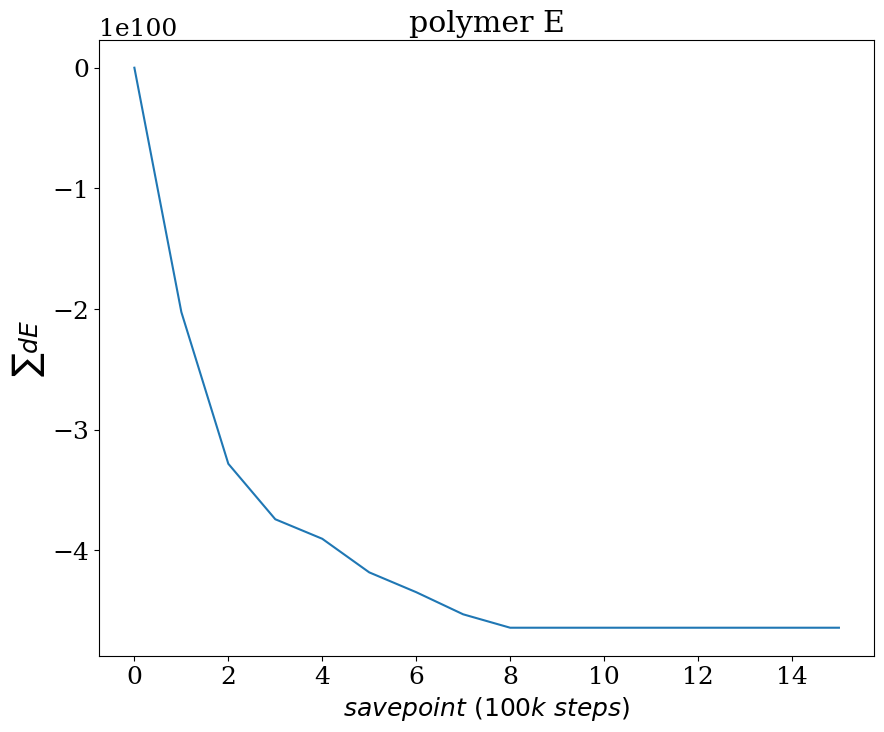

In [102]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.xlabel(r"$savepoint \ (100k \ steps)$")

plt.ylabel(r"$ \sum dE $")
plt.title("polymer E")
# plt.legend()

plt.plot(range(len(filename_list)), np.cumsum(sum_dE_list))
# plt.yscale("log")   


<Figure size 640x480 with 0 Axes>

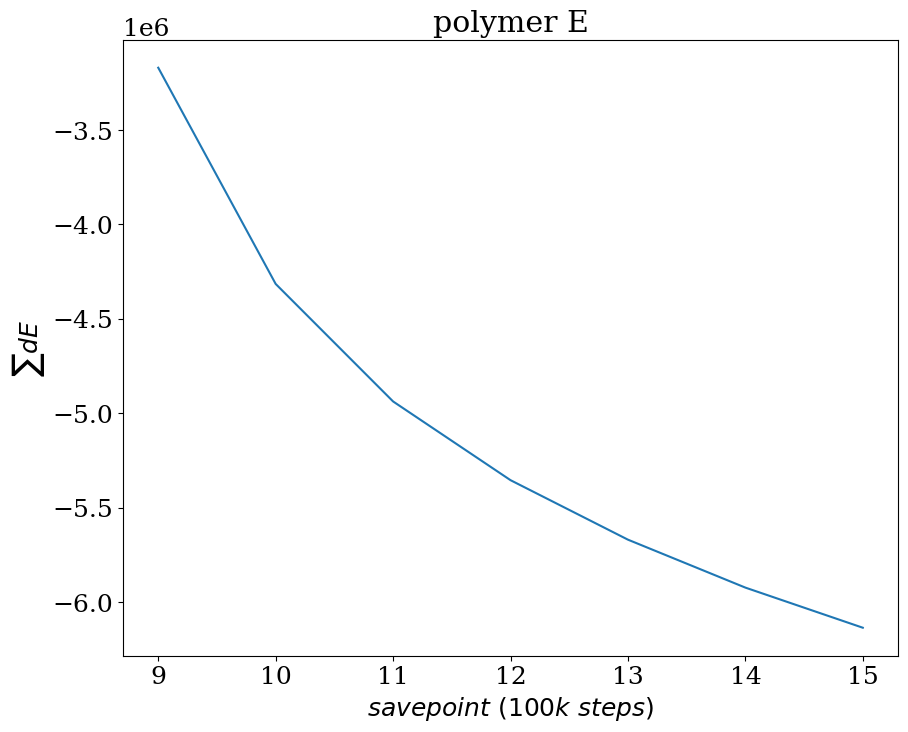

In [105]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.xlabel(r"$savepoint \ (100k \ steps)$")

plt.ylabel(r"$ \sum  dE $")
plt.title("polymer E")
# plt.legend()
starting_E = 0#np.sum(sum_dE_list[:9])
plt.plot(range(len(filename_list))[9:], starting_E + np.cumsum(sum_dE_list[9:]))
# plt.yscale("log")   


## crank shaft

In [36]:

# directory_in_str = r"C:\Users\tmhab\wlcsim_membrane\chrom_stab\chromo_output\mu1_-2_mu2_-1.5"
# directory_in_str = r"C:\Users\tmhab\wlcsim_membrane\chrom_stab\chromo_output\mu1_-1_mu2_-0.5"
directory_in_str = r"C:\Users\tmhab\wlcsim_membrane\chrom_stab\chromo_output\mu1_-4\sim_8\acceptance_trackers"
directory = os.fsencode(directory_in_str)

df_list = []
filename_list = []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    full_path = os.fsdecode(os.path.join(directory, file))
    if filename.endswith(".csv") and filename.startswith("crank"):
        df = pd.read_csv(full_path)

        pos_id = df[['dE']].copy()
        pos_id.columns = pos_id.iloc[0]
        pos_id = pos_id.drop(0)
        
        df_list.append(pos_id)
        filename_list.append(filename)
        
fileint_list = []
for file in filename_list:
    fileint_list.append(int(file[17:][:-4]))

In [64]:
avg_dE_list = np.zeros(len(filename_list))
sum_dE_list = np.zeros(len(filename_list))
for i, df in enumerate(df_list):
#     print(df)
    dE_avg = df.mean()
    dE_sum = df.sum()
    dE_fileint = fileint_list[i]
    avg_dE_list[dE_fileint] = dE_avg
    sum_dE_list[dE_fileint] = dE_sum

<Figure size 640x480 with 0 Axes>

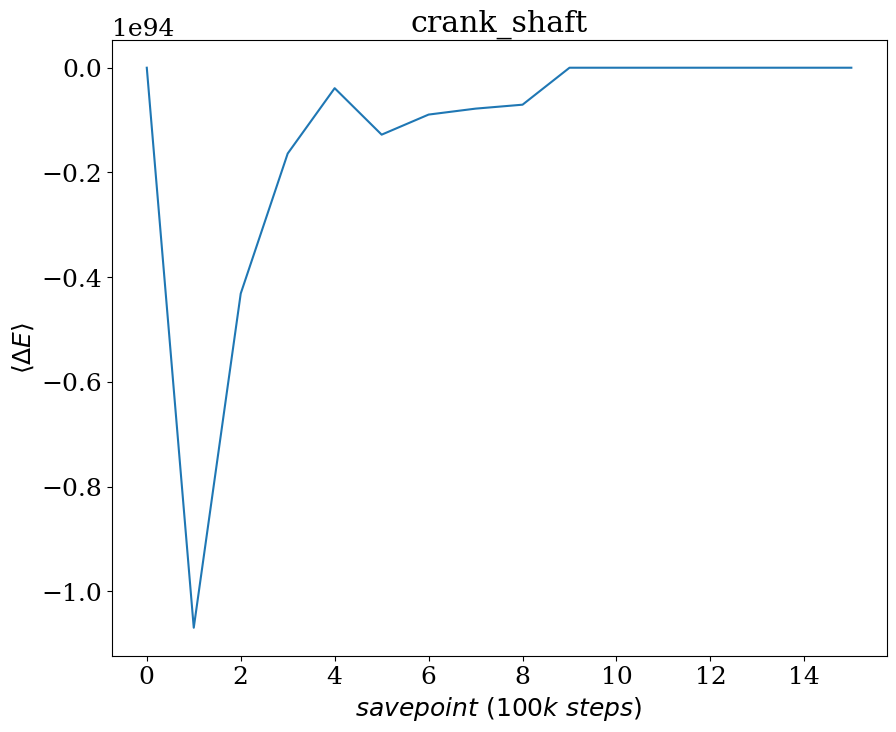

In [62]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.xlabel(r"$savepoint \ (100k \ steps)$")

plt.ylabel(r"$\langle \Delta E \rangle$")
plt.title(filename_list[0][:11])
# plt.legend()

plt.plot(range(len(filename_list)), avg_dE_list)
# plt.yscale("log")   


<Figure size 640x480 with 0 Axes>

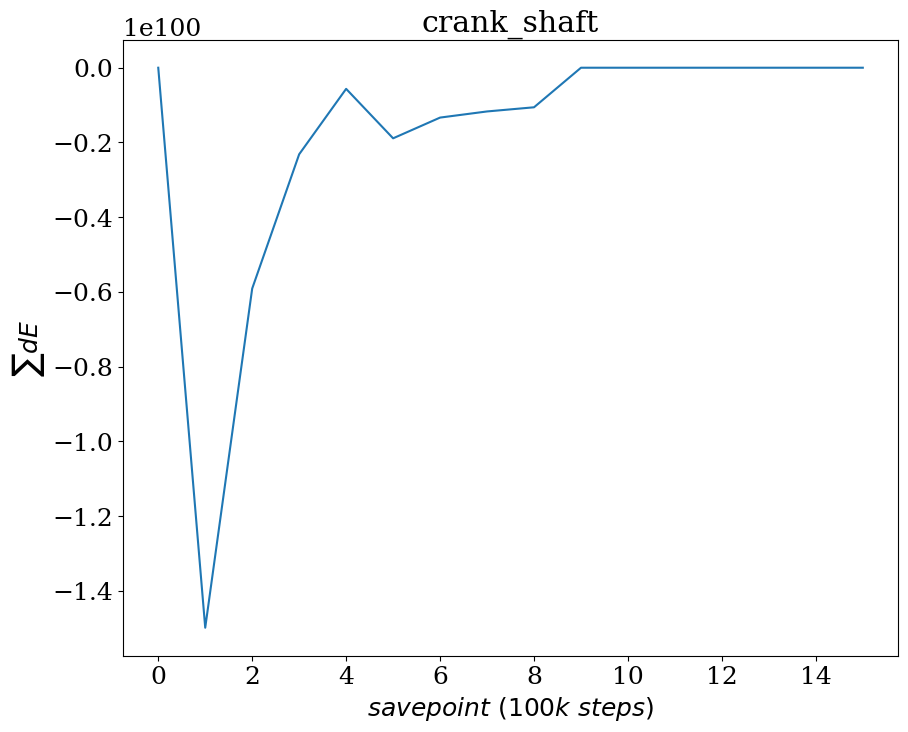

In [67]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.xlabel(r"$savepoint \ (100k \ steps)$")

plt.ylabel(r"$ \sum dE $")
plt.title(filename_list[0][:11])
# plt.legend()

plt.plot(range(len(filename_list)), sum_dE_list)
# plt.yscale("log")   


<Figure size 640x480 with 0 Axes>

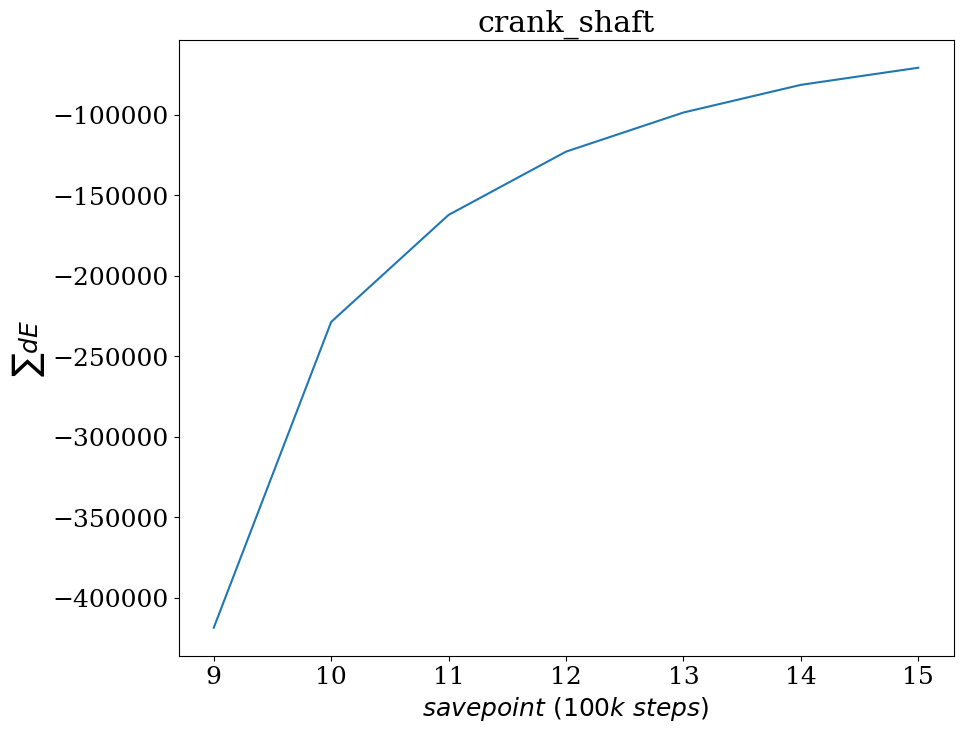

In [68]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.xlabel(r"$savepoint \ (100k \ steps)$")

plt.ylabel(r"$ \sum  dE $")
plt.title(filename_list[0][:11])
# plt.legend()

plt.plot(range(len(filename_list))[9:], sum_dE_list[9:])
# plt.yscale("log")   


## slide

In [73]:

# directory_in_str = r"C:\Users\tmhab\wlcsim_membrane\chrom_stab\chromo_output\mu1_-2_mu2_-1.5"
# directory_in_str = r"C:\Users\tmhab\wlcsim_membrane\chrom_stab\chromo_output\mu1_-1_mu2_-0.5"
directory_in_str = r"C:\Users\tmhab\wlcsim_membrane\chrom_stab\chromo_output\mu1_-4\sim_8\acceptance_trackers"
directory = os.fsencode(directory_in_str)

df_list = []
filename_list = []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    full_path = os.fsdecode(os.path.join(directory, file))
    if filename.endswith(".csv") and filename.startswith("slide"):
        df = pd.read_csv(full_path)

        pos_id = df[['dE']].copy()
        pos_id.columns = pos_id.iloc[0]
        pos_id = pos_id.drop(0)
        
        df_list.append(pos_id)
        filename_list.append(filename)
        
fileint_list = []
for file in filename_list:
    fileint_list.append(int(file[11:][:-4]))

In [74]:
avg_dE_list = np.zeros(len(filename_list))
sum_dE_list = np.zeros(len(filename_list))
for i, df in enumerate(df_list):
#     print(df)
    dE_avg = df.mean()
    dE_sum = df.sum()
    dE_fileint = fileint_list[i]
    avg_dE_list[dE_fileint] = dE_avg
    sum_dE_list[dE_fileint] = dE_sum

<Figure size 640x480 with 0 Axes>

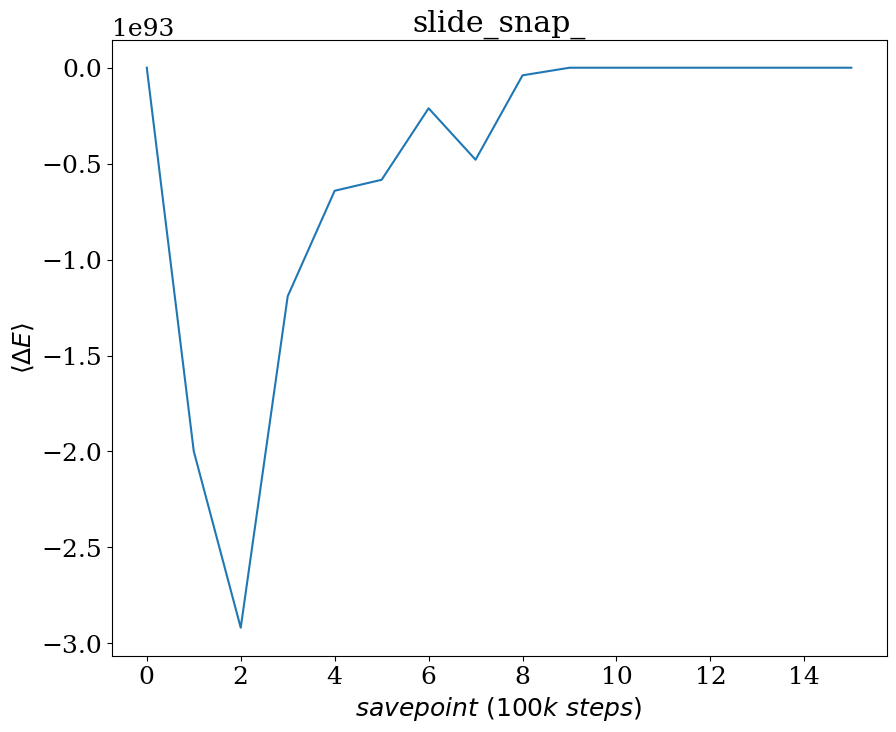

In [75]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.xlabel(r"$savepoint \ (100k \ steps)$")

plt.ylabel(r"$\langle \Delta E \rangle$")
plt.title(filename_list[0][:11])
# plt.legend()

plt.plot(range(len(filename_list)), avg_dE_list)
# plt.yscale("log")   


<Figure size 640x480 with 0 Axes>

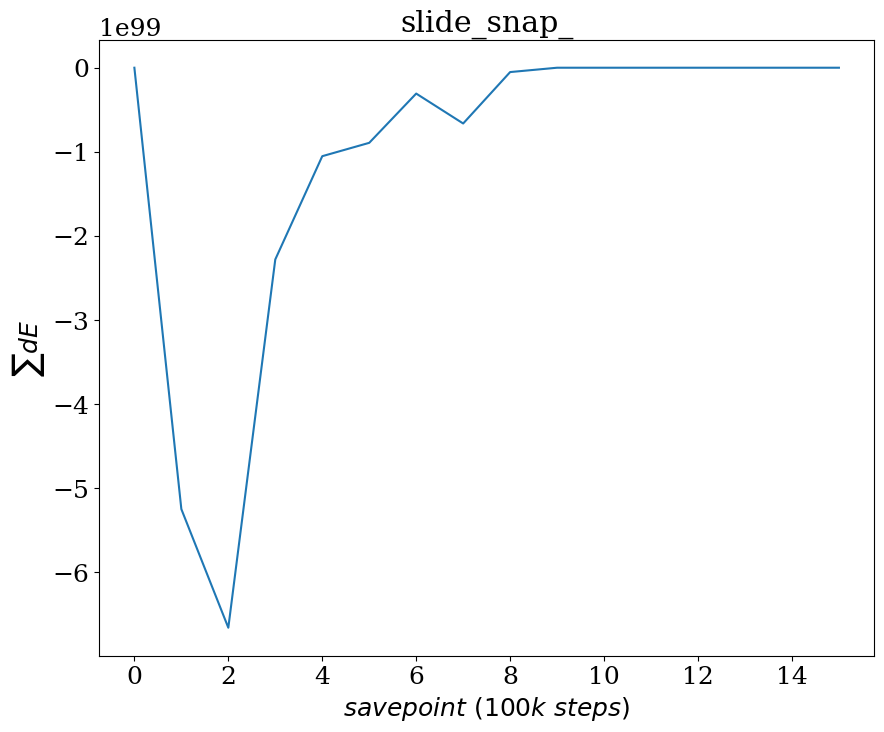

In [76]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.xlabel(r"$savepoint \ (100k \ steps)$")

plt.ylabel(r"$ \sum dE $")
plt.title(filename_list[0][:11])
# plt.legend()

plt.plot(range(len(filename_list)), sum_dE_list)
# plt.yscale("log")   


<Figure size 640x480 with 0 Axes>

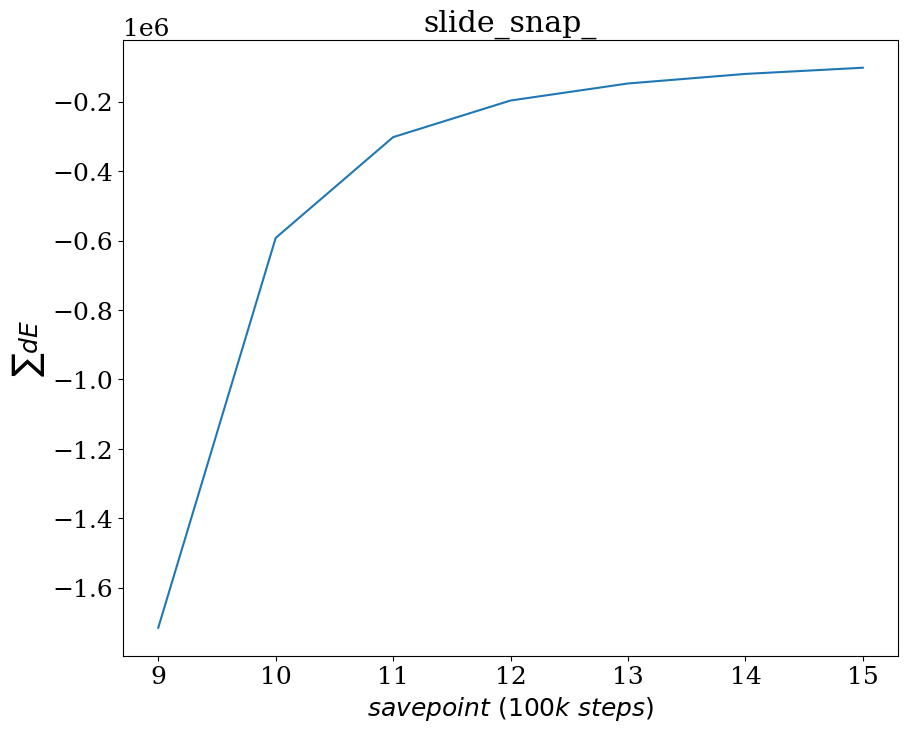

In [77]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.xlabel(r"$savepoint \ (100k \ steps)$")

plt.ylabel(r"$ \sum  dE $")
plt.title(filename_list[0][:11])
# plt.legend()

plt.plot(range(len(filename_list))[9:], sum_dE_list[9:])
# plt.yscale("log")   


## change binding state

In [83]:

# directory_in_str = r"C:\Users\tmhab\wlcsim_membrane\chrom_stab\chromo_output\mu1_-2_mu2_-1.5"
# directory_in_str = r"C:\Users\tmhab\wlcsim_membrane\chrom_stab\chromo_output\mu1_-1_mu2_-0.5"
directory_in_str = r"C:\Users\tmhab\wlcsim_membrane\chrom_stab\chromo_output\mu1_-4\sim_8\acceptance_trackers"
directory = os.fsencode(directory_in_str)

df_list = []
filename_list = []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    full_path = os.fsdecode(os.path.join(directory, file))
    if filename.endswith(".csv") and filename.startswith("change"):
        df = pd.read_csv(full_path)

        pos_id = df[['dE']].copy()
        pos_id.columns = pos_id.iloc[0]
        pos_id = pos_id.drop(0)
        
        df_list.append(pos_id)
        filename_list.append(filename)
        
fileint_list = []
for file in filename_list:
    fileint_list.append(int(file[26:][:-4]))

In [84]:
avg_dE_list = np.zeros(len(filename_list))
sum_dE_list = np.zeros(len(filename_list))
for i, df in enumerate(df_list):
#     print(df)
    dE_avg = df.mean()
    dE_sum = df.sum()
    dE_fileint = fileint_list[i]
    avg_dE_list[dE_fileint] = dE_avg
    sum_dE_list[dE_fileint] = dE_sum

<Figure size 640x480 with 0 Axes>

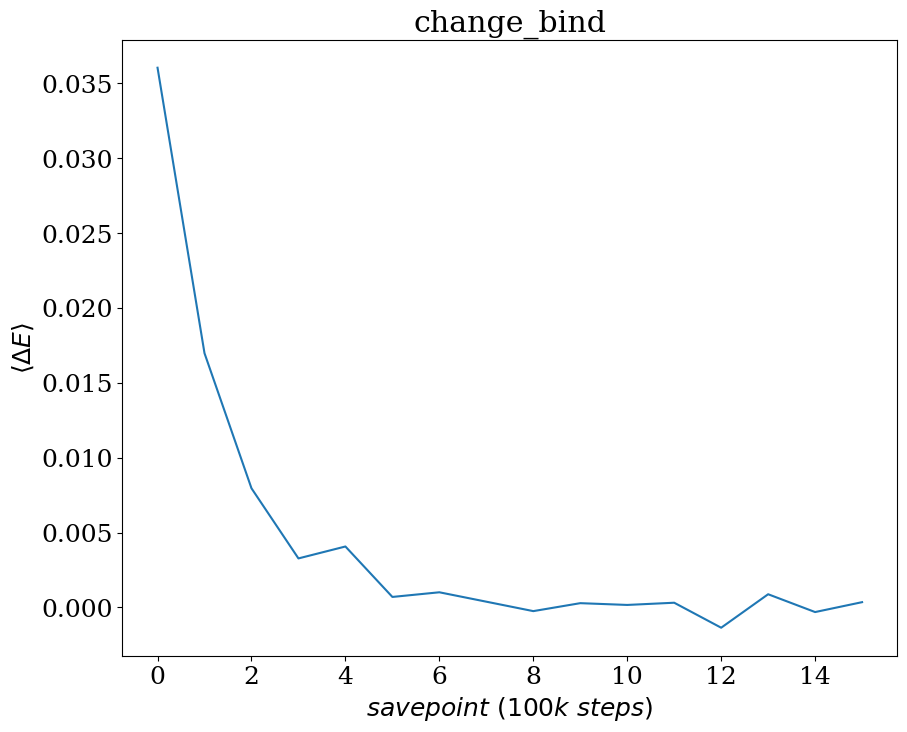

In [85]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.xlabel(r"$savepoint \ (100k \ steps)$")

plt.ylabel(r"$\langle \Delta E \rangle$")
plt.title(filename_list[0][:11])
# plt.legend()

plt.plot(range(len(filename_list)), avg_dE_list)
# plt.yscale("log")   


<Figure size 640x480 with 0 Axes>

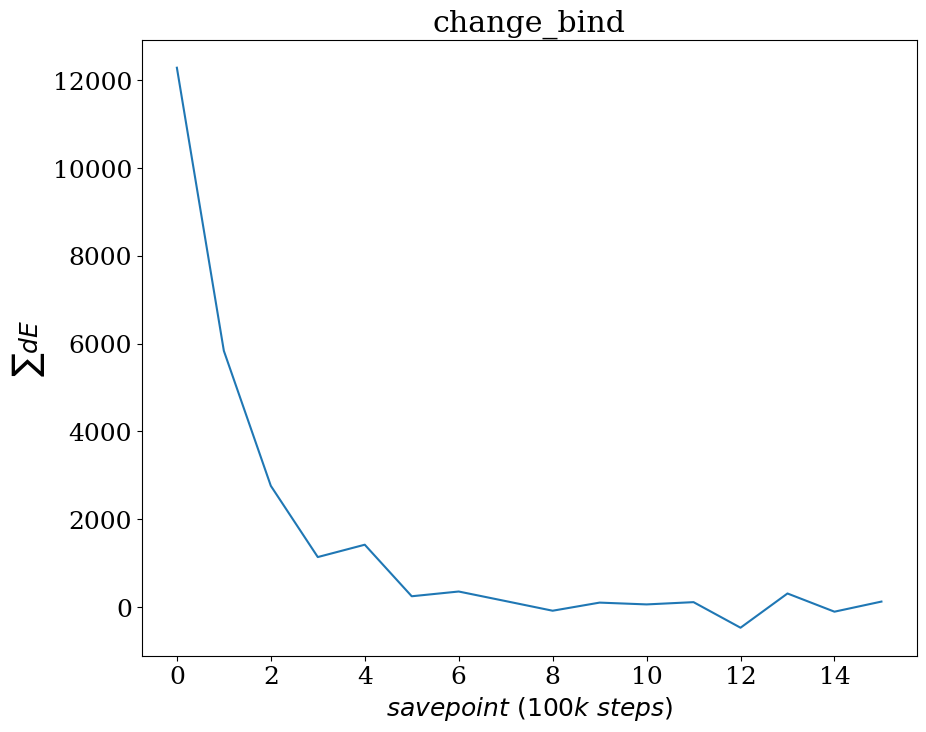

In [86]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.xlabel(r"$savepoint \ (100k \ steps)$")

plt.ylabel(r"$ \sum dE $")
plt.title(filename_list[0][:11])
# plt.legend()

plt.plot(range(len(filename_list)), sum_dE_list)
# plt.yscale("log")   


<Figure size 640x480 with 0 Axes>

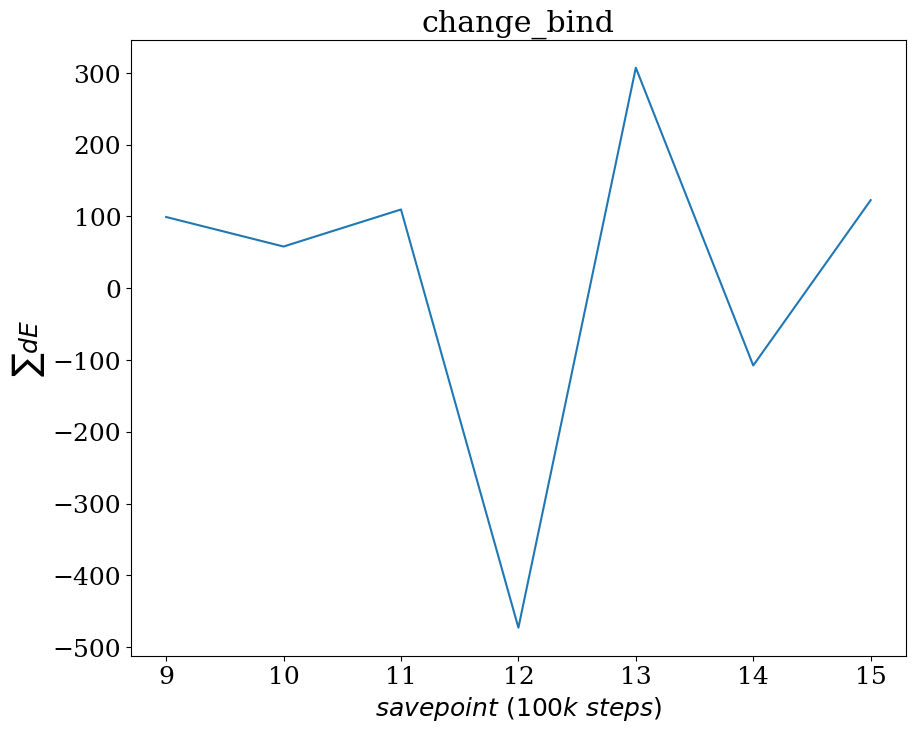

In [87]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.xlabel(r"$savepoint \ (100k \ steps)$")

plt.ylabel(r"$ \sum  dE $")
plt.title(filename_list[0][:11])
# plt.legend()

plt.plot(range(len(filename_list))[9:], sum_dE_list[9:])
# plt.yscale("log")   
